<a href="https://colab.research.google.com/github/brobro10000/braille-reader-opencv/blob/main/braille_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
import os
from google.colab import files
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive


drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [132]:
fileDir = Path("/content/drive/My Drive/Colab Notebooks/Braille Dataset")

In [133]:
def data(pathName):
  listImg = list(pathName.glob('*.jpg'))
  names = []
  images = []
  for i in listImg:
    namePrefix = os.path.basename(i)[0]
    image = cv2.imread(str(i))
    names.append(namePrefix)
    images.append(image)
  npImage = np.array(images)
  npName = np.array(names)
  return (npImage,npName)

(image,name) = data(fileDir)

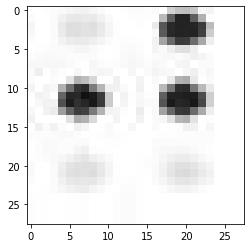

In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
names = le.fit_transform(name)
images = image/255.0

plt.imshow(image[0])

In [138]:
from sklearn.model_selection import train_test_split

X = images;
y = names;
rs = 123

def dataSplit(y,X,train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state=rs)
    return (X_train,X_test,y_train,y_test)

In [140]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, LayerNormalization, BatchNormalization, Flatten, MaxPooling2D
import math
model = Sequential()

def normalizeModel(model, batch=False):
    if(batch):
        return model.add(BatchNormalization())
    else:
        return model.add(LayerNormalization())

def buildEasyModelCNN(activation,optimizer,normalize=False,batch=False):   
    model.add(Conv2D(128, kernel_size = 3, activation=activation, padding='same',input_shape=(28,28,3)))
    model.add(Conv2D(128, kernel_size = 3, activation=activation, padding='same'))
    model.add(Dropout(.75))
    if(normalize):
        normalizeModel(model,batch)
    MaxPooling2D(2)
    model.add(Conv2D(128,  kernel_size = 3,activation=activation, padding='same'))
    model.add(Dropout(.50))
    if(normalize):
        normalizeModel(model,batch)
    MaxPooling2D(2)
    model.add(Conv2D(128,  kernel_size = 3,activation=activation, padding='same'))
    model.add(Dropout(.25))
    if(normalize):
        normalizeModel(model,batch)
    model.add(Dropout(.125))
    model.add(Flatten())
    model.add(Dense(1000, activation=activation))
    model.add(Dense(500, activation=activation))
    model.add(Dense(250, activation=activation))
    model.add(Dense(125, activation=activation))
    model.add(Dense(26, activation='softmax'))
    model.compile(optimizer=optimizer, loss='SparseCategoricalCrossentropy', metrics=["sparse_categorical_accuracy"])
    return model
  
model1 = buildEasyModelCNN('relu','SGD', normalize=False)
# model2 = buildEasyModelCNN('relu','adam', normalize=False)


In [141]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_181 (Conv2D)         (None, 28, 28, 128)       3584      
                                                                 
 conv2d_182 (Conv2D)         (None, 28, 28, 128)       147584    
                                                                 
 dropout_153 (Dropout)       (None, 28, 28, 128)       0         
                                                                 
 conv2d_183 (Conv2D)         (None, 28, 28, 128)       147584    
                                                                 
 dropout_154 (Dropout)       (None, 28, 28, 128)       0         
                                                                 
 conv2d_184 (Conv2D)         (None, 28, 28, 128)       147584    
                                                                 
 dropout_155 (Dropout)       (None, 28, 28, 128)     

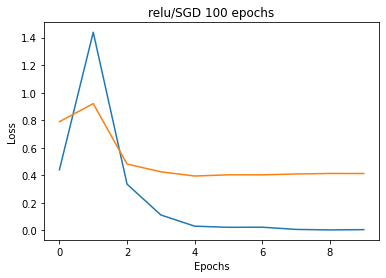

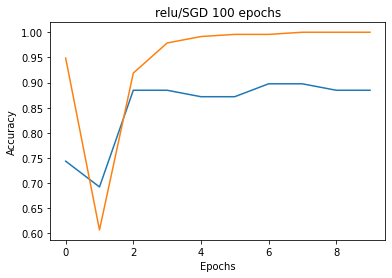

39/39 [==============================] - 0s 7ms/step - loss: 0.1030 - sparse_categorical_accuracy: 0.9720
[0.10298134386539459, 0.9719551205635071]


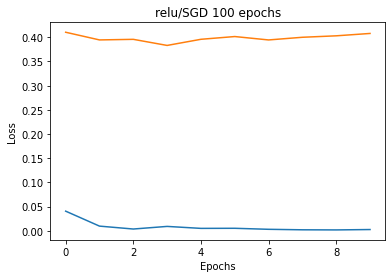

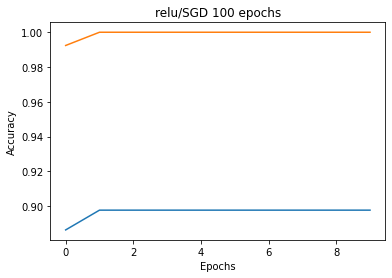

38/38 [==============================] - 0s 9ms/step - loss: 0.1058 - sparse_categorical_accuracy: 0.9727
[0.10580463707447052, 0.9727047085762024]


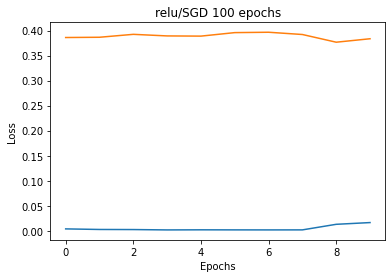

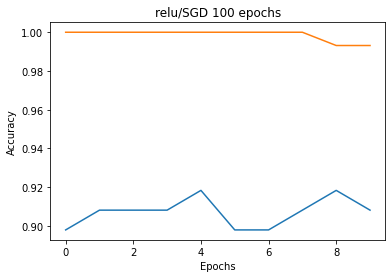

37/37 [==============================] - 0s 8ms/step - loss: 0.0972 - sparse_categorical_accuracy: 0.9761
[0.09723575413227081, 0.976068377494812]


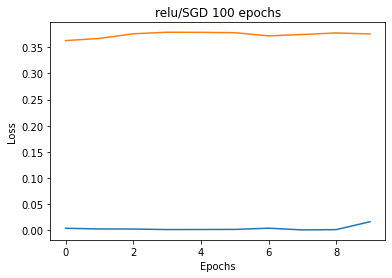

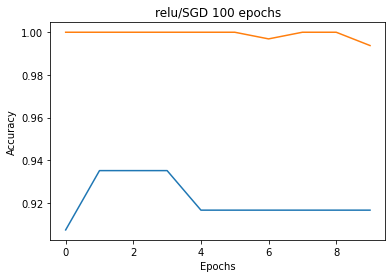

36/36 [==============================] - 0s 8ms/step - loss: 0.0944 - sparse_categorical_accuracy: 0.9788
[0.09439865499734879, 0.9787798523902893]


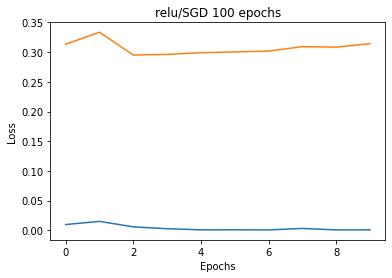

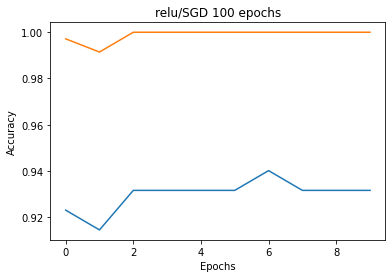

35/35 [==============================] - 0s 7ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9808
[0.07805436849594116, 0.9807692170143127]


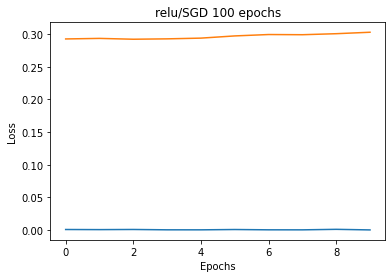

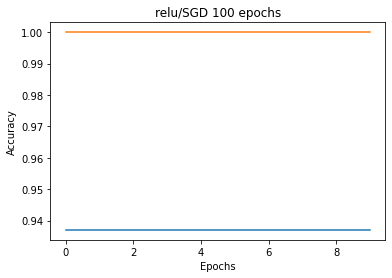

33/33 [==============================] - 0s 7ms/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9791
[0.08135116845369339, 0.9791073203086853]


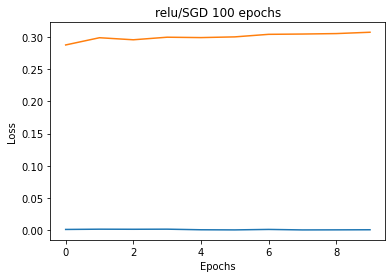

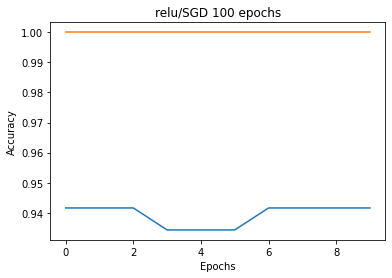

32/32 [==============================] - 0s 8ms/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9783
[0.08479109406471252, 0.9783037304878235]


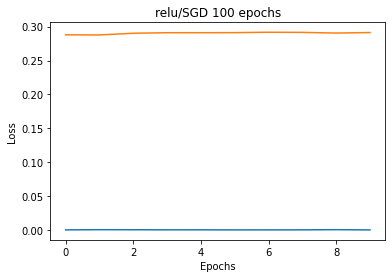

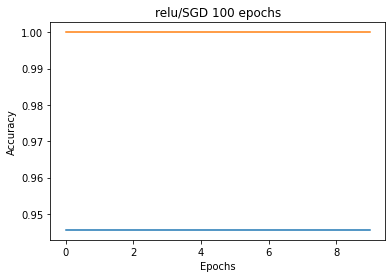

31/31 [==============================] - 0s 9ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9774
[0.08787199854850769, 0.9774358868598938]


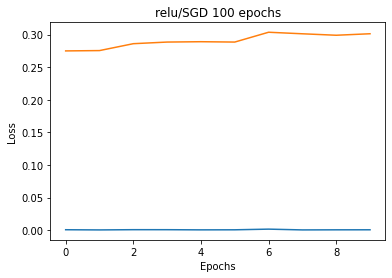

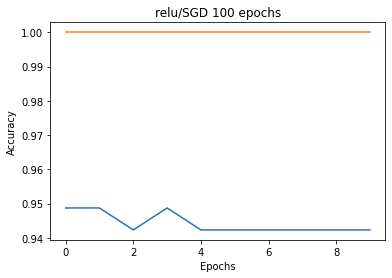

30/30 [==============================] - 0s 8ms/step - loss: 0.0973 - sparse_categorical_accuracy: 0.9776
[0.09729938209056854, 0.9775640964508057]


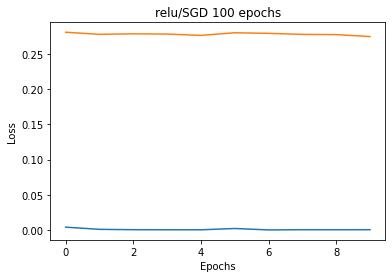

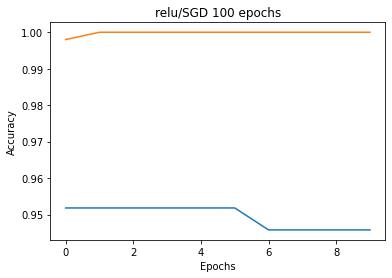

29/29 [==============================] - 0s 8ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9788
[0.0898929312825203, 0.9788182973861694]


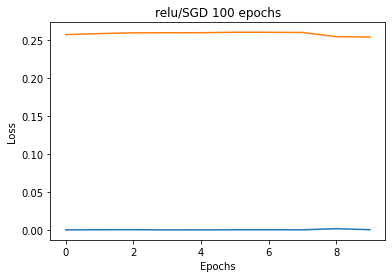

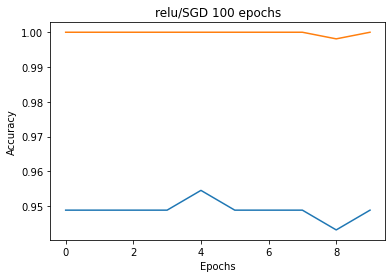

27/27 [==============================] - 0s 9ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9697
[0.10600443184375763, 0.9696969985961914]


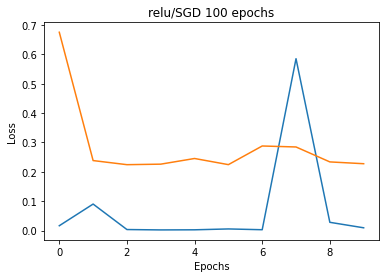

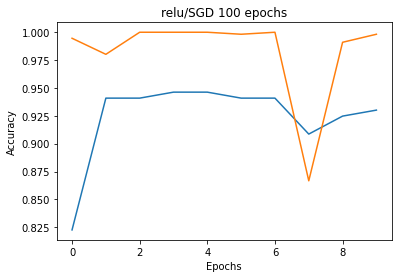

26/26 [==============================] - 0s 7ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9707
[0.11005772650241852, 0.970695972442627]


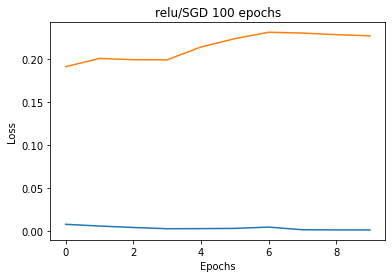

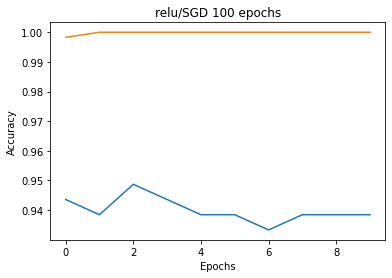

25/25 [==============================] - 0s 8ms/step - loss: 0.1050 - sparse_categorical_accuracy: 0.9718
[0.10498718917369843, 0.971794843673706]


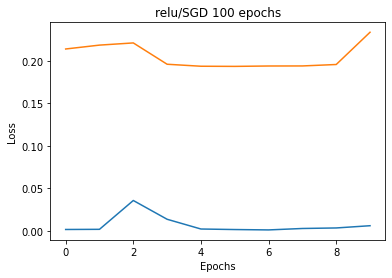

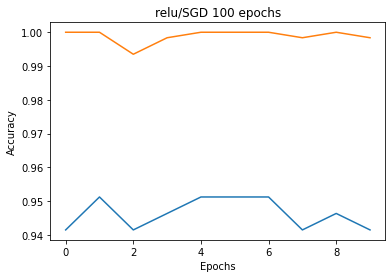

24/24 [==============================] - 0s 7ms/step - loss: 0.1120 - sparse_categorical_accuracy: 0.9676
[0.11203671246767044, 0.9676113128662109]


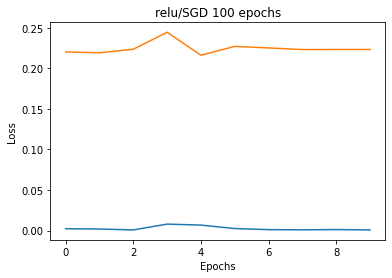

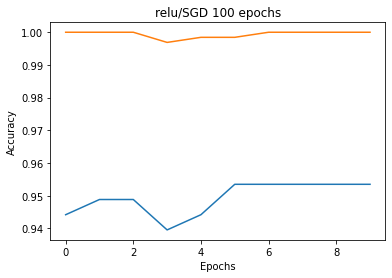

22/22 [==============================] - 0s 8ms/step - loss: 0.1037 - sparse_categorical_accuracy: 0.9672
[0.10371313244104385, 0.9672364592552185]


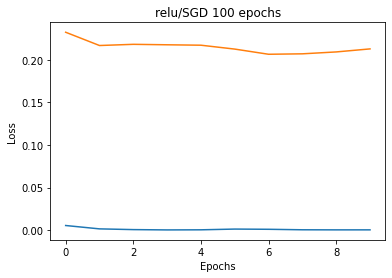

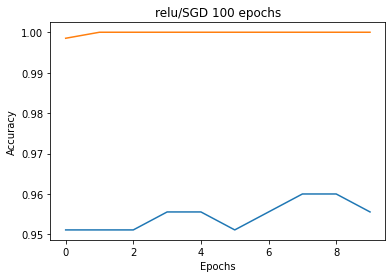

21/21 [==============================] - 0s 7ms/step - loss: 0.1065 - sparse_categorical_accuracy: 0.9744
[0.1064537838101387, 0.9743589758872986]


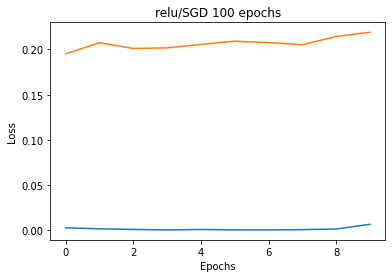

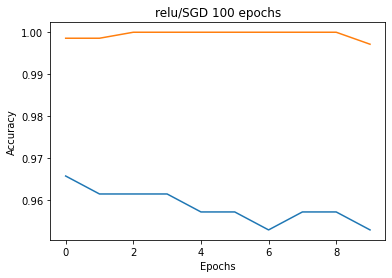

20/20 [==============================] - 0s 7ms/step - loss: 0.1135 - sparse_categorical_accuracy: 0.9728
[0.11348628997802734, 0.9727563858032227]


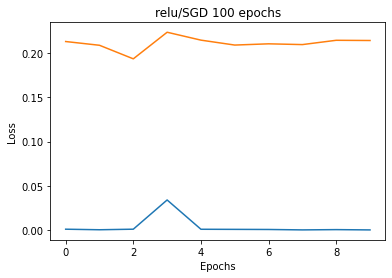

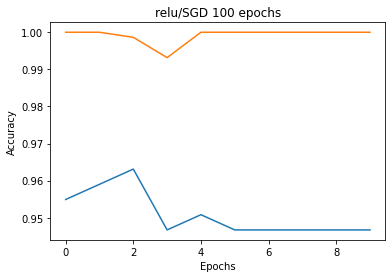

19/19 [==============================] - 0s 8ms/step - loss: 0.1365 - sparse_categorical_accuracy: 0.9709
[0.13648612797260284, 0.9709401726722717]


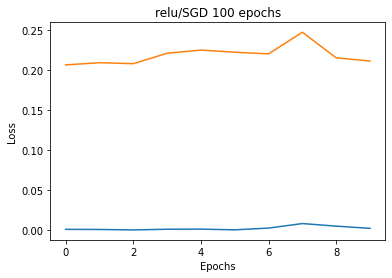

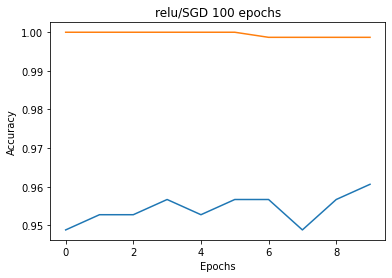

18/18 [==============================] - 0s 7ms/step - loss: 0.1429 - sparse_categorical_accuracy: 0.9707
[0.14285977184772491, 0.970695972442627]


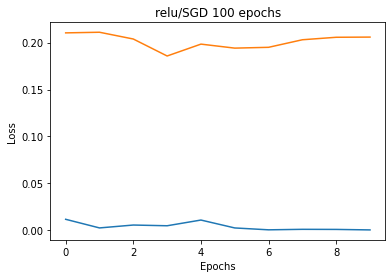

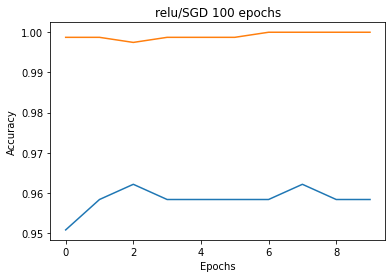

16/16 [==============================] - 0s 8ms/step - loss: 0.1468 - sparse_categorical_accuracy: 0.9724
[0.14683058857917786, 0.9723865985870361]


In [144]:
builtModels = []

X = images;
y = names;
train_data = .20
increment = .025
for i in range(20):
    (X_train,X_test,y_train,y_test) = dataSplit(y,X,train_data)
    firstModel = model1.fit(X_train,y_train, validation_split=.25, epochs=10,verbose=0,shuffle=True)
    # secondModel = model2.fit(X_train,y_train, validation_split=.25, epochs=100,verbose=0,shuffle=True)
    builtModels.append(firstModel)
    train_data += increment
    plt.plot(firstModel.history['loss'])
    plt.plot(firstModel.history['val_loss'])
    plt.title('relu/SGD 100 epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.plot(firstModel.history['val_sparse_categorical_accuracy'])
    plt.plot(firstModel.history['sparse_categorical_accuracy'])
    plt.title('relu/SGD 100 epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    print(model.evaluate(X_test,y_test))
    
print(model.history)

In [146]:
model.evaluate(X,y)

49/49 [==============================] - 0s 8ms/step - loss: 0.0829 - sparse_categorical_accuracy: 0.9840


[0.08289065212011337, 0.9839743375778198]